In [1]:
from types import CodeType
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import pytz
import pvlib   # v 0.7.2

figs_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/INVERTER/figsfinal/"
inv_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/INVERTER/"
gti_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/BSRNminGTI/"
ghi_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/BSRNmin/"

#location = pvlib.location.Location(-27.430891, -48.441406, tz = 'Etc/GMT', altitude= 2.74, name = 'Florianopolis')  # check for daylight savings 'Etc/GMT-3' 'Brazil/East' 'America/Sao_Paulo'

tzBRA = 'Etc/GMT+3'
tzETC = 'Etc/GMT-0'
                   
dcac = ['P_in1', 
        'P_grid',
        'I_in1']

GHIsensor = ['GHIP_SMP11',
             'F_GHIP_SMP11']

GTIsensor = ['TGIP_SMP11_VENT',
             'F_TGIP_SMP11_VENT']

   

#months = ['2018-01','2018-02','2018-03', '2018-04','2018-05','2018-06','2018-07','2018-08', '2018-09','2018-10','2018-11','2018-12',
#          '2019-01','2019-02','2019-03', '2019-04','2019-05','2019-06','2019-07','2019-08', '2019-09','2019-10','2019-11','2019-12',
#          '2020-01','2020-02','2020-03', '2020-04','2020-05','2020-06','2020-07','2020-08', '2020-09','2020-10','2020-11','2020-12',
#          '2021-01']

## The procedure below was needed because on 27/11/18, the inverter datalogger was synchronized with the meteostation, thus changing from GMT-3 to GMT-00. 
# This will allow direct comparison with irradiance timestamps.

dfCDT  = pd.read_csv(inv_path + 'CDT.csv') 
dfCDT['TIMESTAMP'] = dfCDT['TIMESTAMP'].astype(np.datetime64)
dfCDT = dfCDT.drop_duplicates(subset=['TIMESTAMP'])
dfCDT = dfCDT.set_index('TIMESTAMP')
#dfCDT = dfCDT.index.drop_duplicates()
dfCDTnosync = dfCDT[dfCDT.index < '2018-11-27 00:00:00']  # this part is in BRT (GMT - 3)
dfCDTnosync.index = dfCDTnosync.index.tz_localize(tzBRA)
dfCDTnosync.index = dfCDTnosync.index.tz_convert(tzETC)
dfCDTsync = dfCDT[dfCDT.index > '2018-11-28 00:00:00']  #  # this part is in  (GMT - 0)
dfCDTsync.index = dfCDTsync.index.tz_localize(tzETC)
dfCDTsync = [dfCDTnosync, dfCDTsync]
dfCDTsync = pd.concat(dfCDTsync)
dfPCDT = dfCDTsync[dcac]
dfPCDT = dfPCDT.loc['2018-01-01 00:00:00':'2021-01-01 00:00:00']
dfPCDT = dfPCDT.rename(columns={"P_in1": "Pdccdt", "I_in1": "Idccdt", "P_grid": "Paccdt"})
dfPCDT.Idccdt = dfPCDT.Idccdt / 4
dfPCDT.shape

dfCDTA  = pd.read_csv(inv_path + 'CDTA.csv') 
dfCDTA['TIMESTAMP'] = dfCDTA['TIMESTAMP'].astype(np.datetime64)
dfCDTA = dfCDTA.drop_duplicates(subset=['TIMESTAMP'])
dfCDTA = dfCDTA.set_index('TIMESTAMP')
dfCDTAnosync = dfCDTA[dfCDTA.index < '2018-11-27 00:00:00']  # this part is in BRT (GMT - 3)
dfCDTAnosync.index = dfCDTAnosync.index.tz_localize(tzBRA)
dfCDTAnosync.index = dfCDTAnosync.index.tz_convert(tzETC)
dfCDTAsync = dfCDTA[dfCDTA.index > '2018-11-28 00:00:00']  #  # this part is in  (GMT - 0)
dfCDTAsync.index = dfCDTAsync.index.tz_localize(tzETC)
dfCDTAsync = [dfCDTAnosync, dfCDTAsync]
dfCDTAsync = pd.concat(dfCDTAsync)
dfPCDTA = dfCDTAsync[dcac]
dfPCDTA = dfPCDTA.loc['2018-01-01 00:00:00':'2021-01-01 00:00:00']
dfPCDTA = dfPCDTA.rename(columns={"P_in1": "Pdccdta", "I_in1": "Idccdta","P_grid": "Paccdta"})
dfPCDTA.Idccdta = dfPCDTA.Idccdta / 4 
dfPCDTA.shape



dfPSI  = pd.read_csv(inv_path + 'PSI.csv') 
dfPSI['TIMESTAMP'] = dfPSI['TIMESTAMP'].astype(np.datetime64)
dfPSI = dfPSI.drop_duplicates(subset=['TIMESTAMP'])
dfPSI = dfPSI.set_index('TIMESTAMP')
#dfPSI = dfPSI.index.drop_duplicates()
dfPSInosync = dfPSI[dfPSI.index < '2018-11-27 00:00:00']  # this part is in BRT (GMT - 3)
dfPSInosync.index = dfPSInosync.index.tz_localize(tzBRA)
dfPSInosync.index = dfPSInosync.index.tz_convert(tzETC)
dfPSIsync = dfPSI[dfPSI.index > '2018-11-28 00:00:00']  #  # this part is in  (GMT - 0)
dfPSIsync.index = dfPSIsync.index.tz_localize(tzETC)
dfPSIsync = [dfPSInosync, dfPSIsync]
dfPSIsync = pd.concat(dfPSIsync)
dfPPSI = dfPSIsync[dcac]
dfPPSI = dfPPSI.loc['2018-01-01 00:00:00':'2021-01-01 00:00:00']
dfPPSI = dfPPSI.rename(columns={"P_in1": "Pdcpsi", "I_in1": "Idcpsi","P_grid": "Pacpsi"})
dfPPSI.shape



pvsi = pd.merge(dfPCDT,dfPCDTA, how = 'left',left_index = True, right_index = True)
pvsi = pd.merge(pvsi,dfPPSI, how = 'left',left_index = True, right_index = True)

#############

dfgti18 = pd.read_pickle(gti_path + '2018' +'gtiFLAG.pkl')
dfgti19 = pd.read_pickle(gti_path + '2019' +'gtiFLAG.pkl')
dfgti20 = pd.read_pickle(gti_path + '2020' +'gtiFLAG.pkl')
dfgtis = [dfgti18[GTIsensor], dfgti19[GTIsensor], dfgti20[GTIsensor]]
dfgtis = pd.concat(dfgtis)
dfgtis = dfgtis[dfgtis.F_TGIP_SMP11_VENT < 4]

dfghi18 = pd.read_pickle(ghi_path + '2018' +'ghiFLAG.pkl')
dfghi19 = pd.read_pickle(ghi_path + '2019' +'ghiFLAG.pkl')
dfghi20 = pd.read_pickle(ghi_path + '2020' +'ghiFLAG.pkl')
dfghis = [dfghi18[GHIsensor], dfghi19[GHIsensor], dfghi20[GHIsensor]]
dfghis = pd.concat(dfghis)
dfghis = dfghis[dfghis.F_GHIP_SMP11 < 4]


dfirad = pd.merge(dfgtis,dfghis, how = 'inner',left_index = True, right_index = True)

pxir = pd.merge(pvsi,dfirad, how = 'inner',left_index = True, right_index = True)

In [4]:
pxirON = pxir[pxir.Pdccdt>0]

In [6]:
pxirON = pxirON[pxir.Pdcpsi>0]

<ipython-input-6-135ecb76b5fd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pxirON = pxirON[pxir.Pdcpsi>0]


In [8]:
pxirON = pxirON[pxir.TGIP_SMP11_VENT>0]

<ipython-input-8-f7bb3bd5e00c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pxirON = pxirON[pxir.TGIP_SMP11_VENT>0]


In [16]:
pxirON = pxirON[pxirON.F_TGIP_SMP11_VENT ==0]

In [17]:
pxirON

,Pdccdt,Paccdt,Idccdt,Pdccdta,Paccdta,Idccdta,Pdcpsi,Pacpsi,Idcpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt,etacdta,etapsi
2018-01-01 09:18:00+00:00,0.141575,0.137328,0.029450,0.248801,0.208871,0.024370,5.670451,4.225675,0.141359,23.460000,0,22.366667,0,0.000419,0.000736,0.014649
2018-01-01 09:19:00+00:00,2.365055,3.046951,0.030477,3.639148,3.529974,0.029666,8.430031,7.858465,0.160596,24.440000,0,23.553333,0,0.006720,0.010340,0.020905
2018-01-01 09:20:00+00:00,8.832820,7.877726,0.033800,8.463873,8.083471,0.032314,14.737640,14.295510,0.173133,25.558333,0,24.875000,0,0.024000,0.022997,0.034947
2018-01-01 09:21:00+00:00,9.738307,9.446158,0.035394,10.550240,10.233740,0.033178,18.614190,18.055770,0.186426,25.400000,0,24.745000,0,0.026625,0.028845,0.044415
2018-01-01 09:22:00+00:00,10.773150,10.449960,0.037555,12.049820,11.688320,0.037447,20.125390,19.521630,0.197990,25.380000,0,24.265000,0,0.029477,0.032971,0.048058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 21:41:00+00:00,9.156209,7.752251,0.039271,12.245410,11.878050,0.040527,32.642060,31.726530,0.221225,25.995000,0,23.616667,0,0.024460,0.032713,0.076103
2020-12-31 21:42:00+00:00,10.902500,10.575430,0.037798,13.027800,12.636970,0.036961,33.331950,32.332000,0.219388,24.768333,0,22.063333,0,0.030568,0.036527,0.081561
2020-12-31 21:43:00+00:00,10.902500,10.230380,0.034691,13.027800,12.636970,0.038893,31.557940,30.611200,0.202096,21.841667,0,19.018333,0,0.034664,0.041421,0.087567
2020-12-31 21:44:00+00:00,5.469584,6.434767,0.031611,7.811882,6.628881,0.034340,26.498710,25.703750,0.185561,18.908333,0,15.995000,0,0.020088,0.028691,0.084935


In [10]:
pxirON.etacdt = pxirON.Pdccdt/

,Pdccdt,Paccdt,Idccdt,Pdccdta,Paccdta,Idccdta,Pdcpsi,Pacpsi,Idcpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11
2018-01-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.823333,0,-2.200000,1
2018-01-01 00:01:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.800000,0,-2.183333,1
2018-01-01 00:02:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.800000,0,-2.185000,1
2018-01-01 00:03:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.890000,0,-2.246667,1
2018-01-01 00:04:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.105000,0,-2.650000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:55:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.100000,0,-4.770000,3
2020-12-31 23:56:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.100000,0,-4.776667,3
2020-12-31 23:57:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.103333,0,-4.793333,3
2020-12-31 23:58:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.100000,0,-4.800000,3


In [18]:
pxirON['etacdt'] = pxirON.Pdccdt/(pxirON.TGIP_SMP11_VENT*14.4)
pxirON['etacdta'] = pxirON.Pdccdta/(pxirON.TGIP_SMP11_VENT*14.4)
pxirON['etapsi'] =  pxirON.Pdcpsi /(pxirON.TGIP_SMP11_VENT*16.5)

In [19]:
pxirON

,Pdccdt,Paccdt,Idccdt,Pdccdta,Paccdta,Idccdta,Pdcpsi,Pacpsi,Idcpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,etacdt,etacdta,etapsi
2018-01-01 09:18:00+00:00,0.141575,0.137328,0.029450,0.248801,0.208871,0.024370,5.670451,4.225675,0.141359,23.460000,0,22.366667,0,0.000419,0.000736,0.014649
2018-01-01 09:19:00+00:00,2.365055,3.046951,0.030477,3.639148,3.529974,0.029666,8.430031,7.858465,0.160596,24.440000,0,23.553333,0,0.006720,0.010340,0.020905
2018-01-01 09:20:00+00:00,8.832820,7.877726,0.033800,8.463873,8.083471,0.032314,14.737640,14.295510,0.173133,25.558333,0,24.875000,0,0.024000,0.022997,0.034947
2018-01-01 09:21:00+00:00,9.738307,9.446158,0.035394,10.550240,10.233740,0.033178,18.614190,18.055770,0.186426,25.400000,0,24.745000,0,0.026625,0.028845,0.044415
2018-01-01 09:22:00+00:00,10.773150,10.449960,0.037555,12.049820,11.688320,0.037447,20.125390,19.521630,0.197990,25.380000,0,24.265000,0,0.029477,0.032971,0.048058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 21:41:00+00:00,9.156209,7.752251,0.039271,12.245410,11.878050,0.040527,32.642060,31.726530,0.221225,25.995000,0,23.616667,0,0.024460,0.032713,0.076103
2020-12-31 21:42:00+00:00,10.902500,10.575430,0.037798,13.027800,12.636970,0.036961,33.331950,32.332000,0.219388,24.768333,0,22.063333,0,0.030568,0.036527,0.081561
2020-12-31 21:43:00+00:00,10.902500,10.230380,0.034691,13.027800,12.636970,0.038893,31.557940,30.611200,0.202096,21.841667,0,19.018333,0,0.034664,0.041421,0.087567
2020-12-31 21:44:00+00:00,5.469584,6.434767,0.031611,7.811882,6.628881,0.034340,26.498710,25.703750,0.185561,18.908333,0,15.995000,0,0.020088,0.028691,0.084935


In [14]:
pxirON.mean()

Pdccdt               788.536441
Paccdt               764.930667
Idccdt                 0.649792
Pdccdta              808.527263
Paccdta              784.367311
Idccdta                0.660813
Pdcpsi               821.115275
Pacpsi               796.595437
Idcpsi                 3.216949
TGIP_SMP11_VENT      433.719207
F_TGIP_SMP11_VENT      0.000000
GHIP_SMP11           399.295581
F_GHIP_SMP11           0.000068
etacdt                 0.282280
etacdta                0.296217
etapsi                 0.264810
dtype: float64

In [23]:
pxirON[pxirON.TGIP_SMP11_VENT>1000].mean()

Pdccdt               1889.761138
Paccdt               1833.331468
Idccdt                  1.573887
Pdccdta              1913.809319
Paccdta              1856.904183
Idccdta                 1.588179
Pdcpsi               1921.442729
Pacpsi               1864.416121
Idcpsi                  7.796307
TGIP_SMP11_VENT      1069.963528
F_TGIP_SMP11_VENT       0.000000
GHIP_SMP11           1018.437838
F_GHIP_SMP11            0.000156
etacdt                  0.122937
etacdta                 0.124501
etapsi                  0.109118
dtype: float64

In [24]:
location = pvlib.location.Location(
            -27.430891, 
            -48.441406, 
            tz = 'Etc/GMT',    # check for daylight savings 'Etc/GMT-3' 'Brazil/East' 'America/Sao_Paulo'
          altitude= 2.74, 
            name = 'Florianopolis'
            )  

In [25]:
naive_times = pd.date_range(start='2020-01-01 00:00:00', end='2020-12-31 23:59:00', freq='1Min')


In [26]:
times = naive_times.tz_localize(location.tz) 


In [27]:
times

DatetimeIndex(['2020-01-01 00:00:00+00:00', '2020-01-01 00:01:00+00:00',
               '2020-01-01 00:02:00+00:00', '2020-01-01 00:03:00+00:00',
               '2020-01-01 00:04:00+00:00', '2020-01-01 00:05:00+00:00',
               '2020-01-01 00:06:00+00:00', '2020-01-01 00:07:00+00:00',
               '2020-01-01 00:08:00+00:00', '2020-01-01 00:09:00+00:00',
               ...
               '2020-12-31 23:50:00+00:00', '2020-12-31 23:51:00+00:00',
               '2020-12-31 23:52:00+00:00', '2020-12-31 23:53:00+00:00',
               '2020-12-31 23:54:00+00:00', '2020-12-31 23:55:00+00:00',
               '2020-12-31 23:56:00+00:00', '2020-12-31 23:57:00+00:00',
               '2020-12-31 23:58:00+00:00', '2020-12-31 23:59:00+00:00'],
              dtype='datetime64[ns, Etc/GMT]', length=527040, freq=None)

In [28]:
BSRNm_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/BSRNmin/" 


In [29]:
solpos = pd.read_pickle(BSRNm_path+'2020solpos.pkl')


In [30]:
solpos

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2020-01-01 00:00:00+00:00,110.675983,110.675983,-20.675983,-20.675983,228.124200,-3.081724
2020-01-01 00:01:00+00:00,110.840960,110.840960,-20.840960,-20.840960,227.952900,-3.082055
2020-01-01 00:02:00+00:00,111.005493,111.005493,-21.005493,-21.005493,227.780922,-3.082386
2020-01-01 00:03:00+00:00,111.169577,111.169577,-21.169577,-21.169577,227.608265,-3.082717
2020-01-01 00:04:00+00:00,111.333210,111.333210,-21.333210,-21.333210,227.434924,-3.083048
...,...,...,...,...,...,...
2020-12-31 23:55:00+00:00,109.826804,109.826804,-19.826804,-19.826804,229.075378,-3.429660
2020-12-31 23:56:00+00:00,109.994228,109.994228,-19.994228,-19.994228,228.907578,-3.429987
2020-12-31 23:57:00+00:00,110.161225,110.161225,-20.161225,-20.161225,228.739117,-3.430314
2020-12-31 23:58:00+00:00,110.327790,110.327790,-20.327790,-20.327790,228.569993,-3.430641


In [31]:
ghi = pd.read_pickle(BSRNm_path+'2020ghiFLAG.pkl')
dif = pd.read_pickle(BSRNm_path+'2020difFLAG.pkl')

In [32]:
ghi

,PPmax,PPmin,ERmax,ERmin,F_GHIP_SI02pt100,F_GHIP_SMP11,F_GHIP_SMP22,F_GHIP_SPN1,F_GHIT_SMP22,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,sumflags
2020-01-01 00:00:00+00:00,NaN,-4,NaN,-2,0,1,0,0,0,0.000000,-2.872414,0.289655,2.605207,-4.000000,NaN
2020-01-01 00:01:00+00:00,NaN,-4,NaN,-2,0,1,0,0,0,-0.003933,-2.800000,0.300000,2.420817,-4.000000,NaN
2020-01-01 00:02:00+00:00,NaN,-4,NaN,-2,0,1,0,0,1,-0.001967,-2.800000,0.306667,2.689667,-3.533333,NaN
2020-01-01 00:03:00+00:00,NaN,-4,NaN,-2,0,1,0,0,1,0.000000,-2.800000,0.398333,2.459233,-3.000000,NaN
2020-01-01 00:04:00+00:00,NaN,-4,NaN,-2,0,1,0,0,1,-0.000983,-2.800000,0.400000,2.338500,-3.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:55:00+00:00,NaN,-4,NaN,-2,0,3,0,0,0,0.000000,-4.770000,0.690000,2.458317,-1.000000,NaN
2020-12-31 23:56:00+00:00,NaN,-4,NaN,-2,0,3,0,0,0,-0.000983,-4.776667,0.671667,2.458550,-1.000000,NaN
2020-12-31 23:57:00+00:00,NaN,-4,NaN,-2,0,3,0,0,0,0.000000,-4.793333,0.635000,2.465000,-1.000000,NaN
2020-12-31 23:58:00+00:00,NaN,-4,NaN,-2,0,3,0,0,0,0.000000,-4.800000,0.600000,2.498517,-1.000000,NaN


In [36]:
main_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/CLEAN/" 

ghi = pd.read_pickle(main_path+'2020GHI.pkl')
dif = pd.read_pickle(main_path+'2020DIF.pkl')
dni = pd.read_pickle(main_path+'2020DNI.pkl')

In [37]:
ghi = ghi.resample('1Min').mean()
dif = dif.resample('1Min').mean()  
dni = dni.resample('1Min').mean()  

In [38]:
gti = pd.read_pickle(main_path+'2020GTI.pkl')
gti = gti.resample('1Min').mean()


In [39]:
ghi.index = ghi.index.tz_localize(location.tz)
gti.index = gti.index.tz_localize(location.tz)


In [41]:
dni.index = dni.index.tz_localize(location.tz)
dif.index = dif.index.tz_localize(location.tz)

In [42]:
ghiBRA  = ghi

In [43]:
tzBRA = 'Etc/GMT+3'

In [44]:
ghiBRA.index = ghiBRA.index.tz_convert(tzBRA)

In [46]:
dni_extra = pvlib.irradiance.get_extra_radiation(solpos.index)
airmass   = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
pressure  = pvlib.atmosphere.alt2pres(location.altitude)
am_abs    = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)

In [47]:
sensor_tilt = 27
sensor_azimuth = 0
aoi       = pvlib.irradiance.aoi(
        sensor_tilt,
        sensor_azimuth,
        solpos["apparent_zenith"],
        solpos["azimuth"],
    )

In [48]:
 total_irradianceSMP = pvlib.irradiance.get_total_irradiance(
        sensor_tilt,
        sensor_azimuth,
        solpos['apparent_zenith'],
        solpos['azimuth'],
        dni.DNI_SHP1,
        ghi.GHIP_SMP22,
        dif.DfHIRP_SMP11,
        dni_extra = dni_extra,
        model='reindl')

/Users/nataly/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [50]:
total_irradianceSMP

,poa_global,poa_direct,poa_diffuse,poa_sky_diffuse,poa_ground_diffuse
TIMESTAMP,,,,,
2020-01-01 00:00:00+00:00,0.914544,0.910597,0.003946,0.0,0.003946
2020-01-01 00:01:00+00:00,0.905828,0.901740,0.004087,0.0,0.004087
2020-01-01 00:02:00+00:00,0.910451,0.906273,0.004178,0.0,0.004178
2020-01-01 00:03:00+00:00,0.910143,0.904716,0.005427,0.0,0.005427
2020-01-01 00:04:00+00:00,0.915650,0.910200,0.005450,0.0,0.005450
...,...,...,...,...,...
2020-12-31 23:55:00+00:00,0.824165,0.814764,0.009401,0.0,0.009401
2020-12-31 23:56:00+00:00,0.818497,0.809346,0.009151,0.0,0.009151
2020-12-31 23:57:00+00:00,0.831086,0.822434,0.008651,0.0,0.008651


In [51]:
    total_irradianceSPN1 = pvlib.irradiance.get_total_irradiance(
        sensor_tilt,
        sensor_azimuth,
        solpos['apparent_zenith'],
        solpos['azimuth'],
        dni.DNI_SHP1,
        ghi.GHIP_SPN1,
        dif.DfHIP_SPN1,
        dni_extra = dni_extra,
        model='reindl' )

In [52]:
gti['poa_smp'] = total_irradianceSMP.poa_global

In [53]:
gti['poa_SPN1'] = total_irradianceSPN1.poa_global

In [66]:
gtib = gti[['TGIP_SMP11_VENT','poa_smp',]]

In [121]:
gtic = gti[['TGIP_SMP11_VENT','poa_smp', 'poa_SPN1']]

In [67]:
gtib

,TGIP_SMP11_VENT,poa_smp
TIMESTAMP,,
2019-12-31 21:00:00-03:00,-1.867241,0.914544
2019-12-31 21:01:00-03:00,-1.800000,0.905828
2019-12-31 21:02:00-03:00,-1.846667,0.910451
2019-12-31 21:03:00-03:00,-1.900000,0.910143
2019-12-31 21:04:00-03:00,-1.891667,0.915650
...,...,...
2020-12-31 20:55:00-03:00,-1.100000,0.824165
2020-12-31 20:56:00-03:00,-1.100000,0.818497
2020-12-31 20:57:00-03:00,-1.103333,0.831086


In [96]:
gtib['res'] = (gtib.TGIP_SMP11_VENT - gtib.poa_smp)

<ipython-input-96-33fb91ab2fe1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtib['res'] = (gtib.TGIP_SMP11_VENT - gtib.poa_smp)


In [128]:
residualSMP = [(gtic.TGIP_SMP11_VENT - gtic.poa_smp)/gtic.TGIP_SMP11_VENT]

In [129]:
residualSPN1 = [(gtic.TGIP_SMP11_VENT - gtic.poa_SPN1)/gtic.TGIP_SMP11_VENT]

In [148]:
resi = pd.DataFrame(columns = ['resSMP', 'resSPN1'])


In [149]:
resi.resSMP = (gtic.TGIP_SMP11_VENT - gtic.poa_smp)/gtic.TGIP_SMP11_VENT

In [150]:
resi.resSPN1 = (gtic.TGIP_SMP11_VENT - gtic.poa_SPN1)/gtic.TGIP_SMP11_VENT

In [151]:
resi

,resSMP,resSPN1
TIMESTAMP,,
2019-12-31 21:00:00-03:00,1.489783,2.819160
2019-12-31 21:01:00-03:00,1.503238,2.870537
2019-12-31 21:02:00-03:00,1.493024,2.845047
2019-12-31 21:03:00-03:00,1.479022,2.712504
2019-12-31 21:04:00-03:00,1.484044,2.771329
...,...,...
2020-12-31 20:55:00-03:00,1.749241,3.921753
2020-12-31 20:56:00-03:00,1.744088,3.935815
2020-12-31 20:57:00-03:00,1.753250,3.928138


In [97]:
gtib

,TGIP_SMP11_VENT,poa_smp,res
TIMESTAMP,,,
2019-12-31 21:00:00-03:00,-1.867241,0.914544,-2.781785
2019-12-31 21:01:00-03:00,-1.800000,0.905828,-2.705828
2019-12-31 21:02:00-03:00,-1.846667,0.910451,-2.757117
2019-12-31 21:03:00-03:00,-1.900000,0.910143,-2.810143
2019-12-31 21:04:00-03:00,-1.891667,0.915650,-2.807317
...,...,...,...
2020-12-31 20:55:00-03:00,-1.100000,0.824165,-1.924165
2020-12-31 20:56:00-03:00,-1.100000,0.818497,-1.918497
2020-12-31 20:57:00-03:00,-1.103333,0.831086,-1.934419


In [55]:
gti.index = gti.index.tz_convert(tzBRA)

<AxesSubplot:xlabel='TIMESTAMP'>

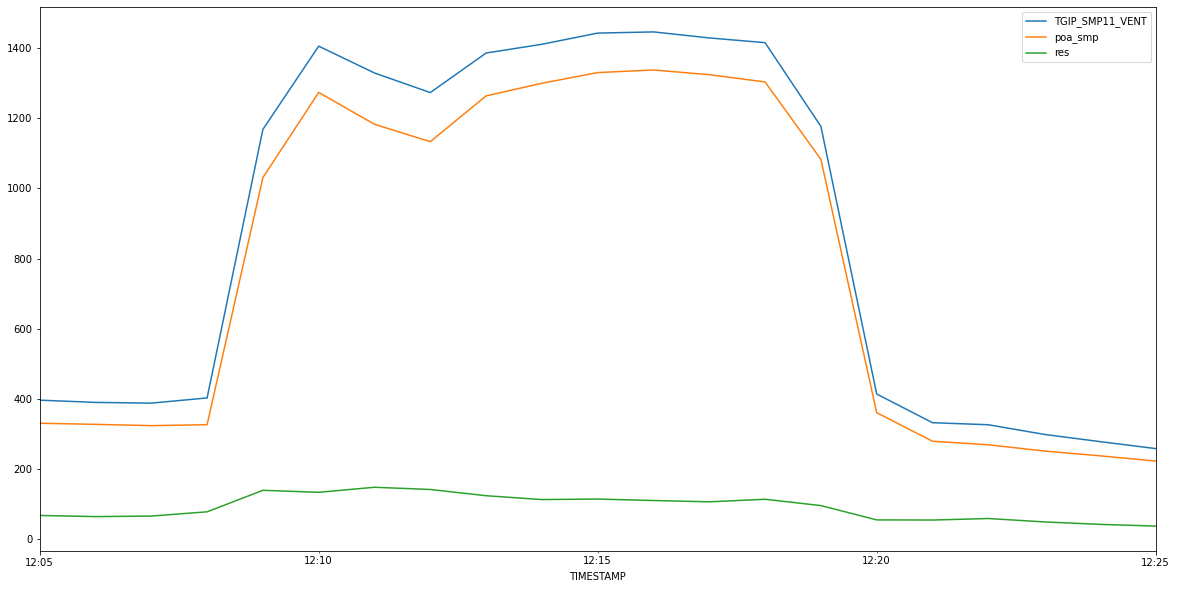

In [100]:
gtib.loc['2020-10-17 12:05:00':'2020-10-17 12:25:00'].plot(figsize=(20,10))


<AxesSubplot:xlabel='TIMESTAMP'>

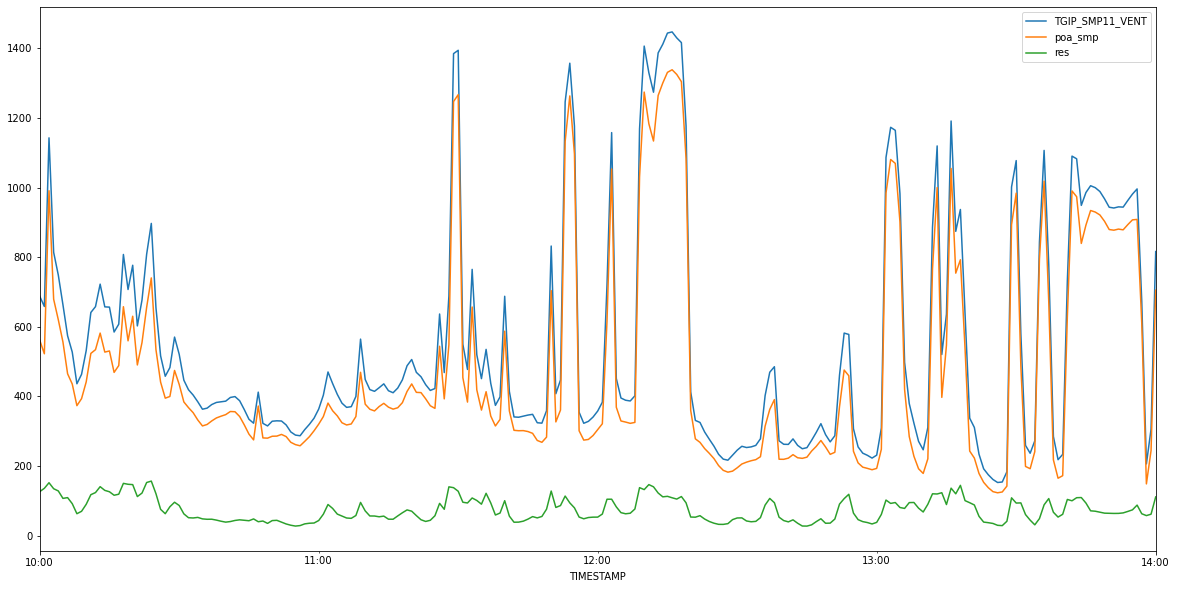

In [98]:
gtib.loc['2020-10-17 10:00:00':'2020-10-17 14:00:00'].plot(figsize=(20,10))


<AxesSubplot:xlabel='TIMESTAMP'>

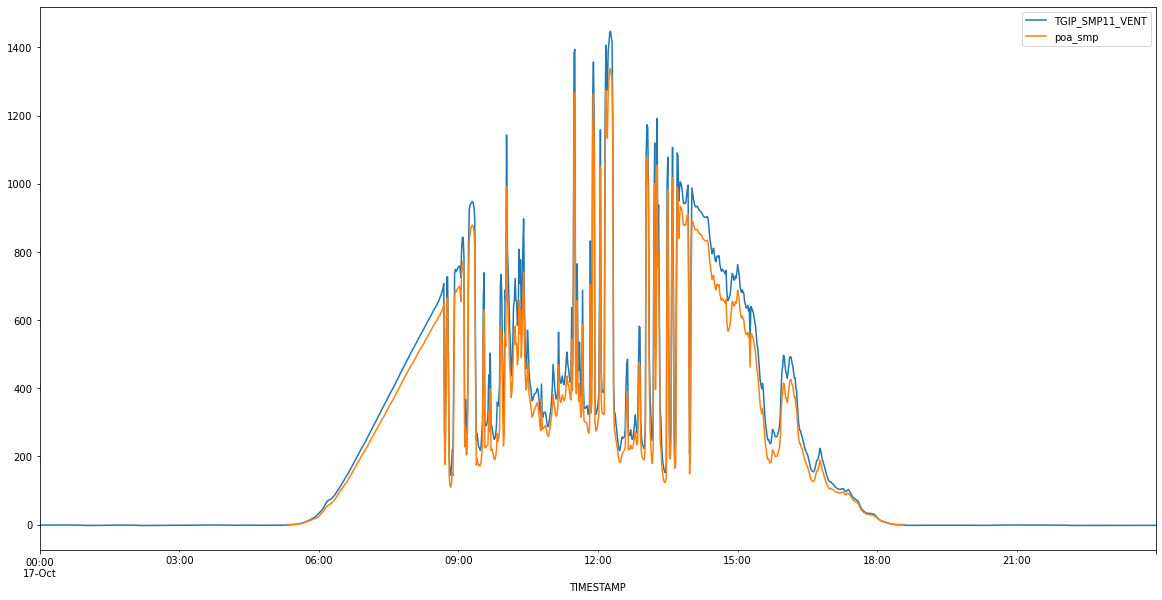

In [69]:
gtib.loc['2020-10-17':'2020-10-17'].plot(figsize=(20,10))

<AxesSubplot:xlabel='TIMESTAMP'>

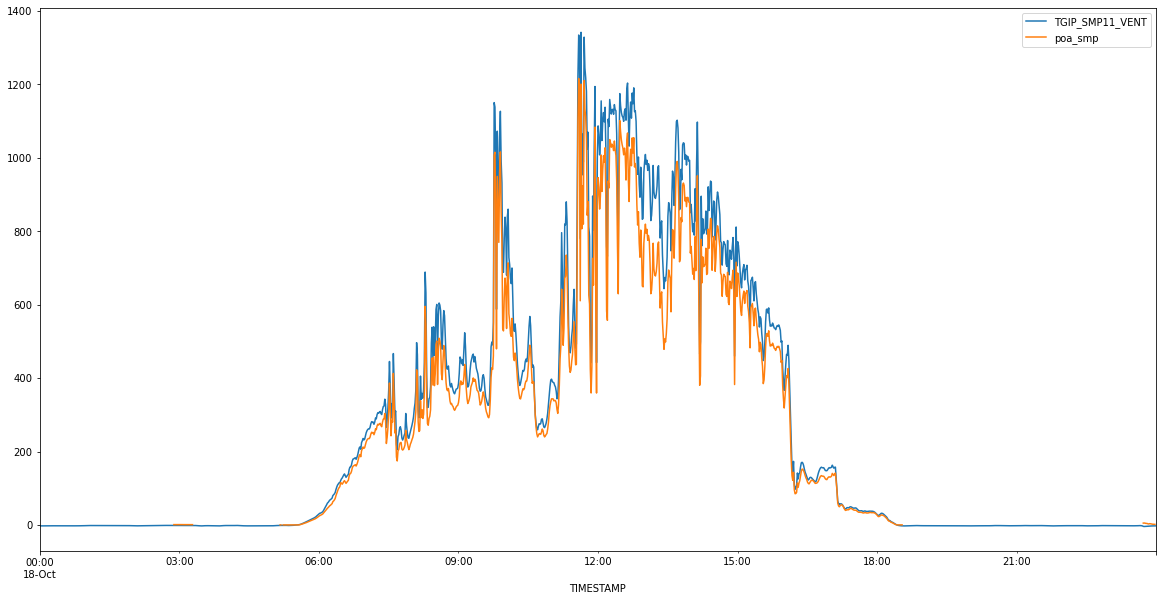

In [70]:
gtib.loc['2020-10-18'].plot(figsize=(20,10))

<AxesSubplot:xlabel='TIMESTAMP'>

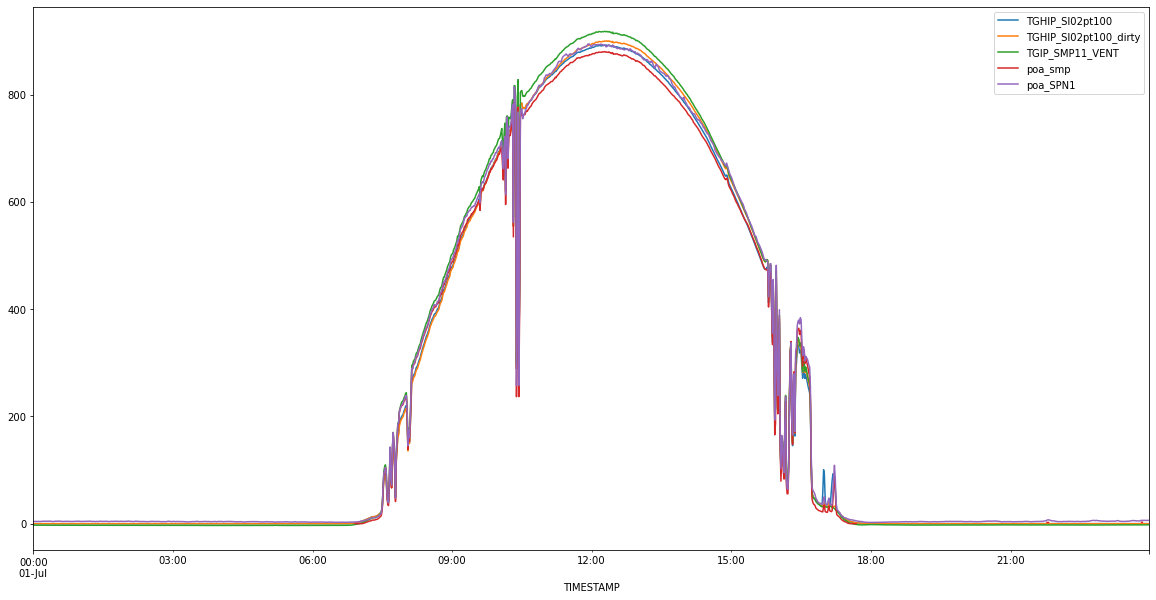

In [74]:
gti.loc['2020-07-01'].plot(figsize=(20,10))

<AxesSubplot:xlabel='TIMESTAMP'>

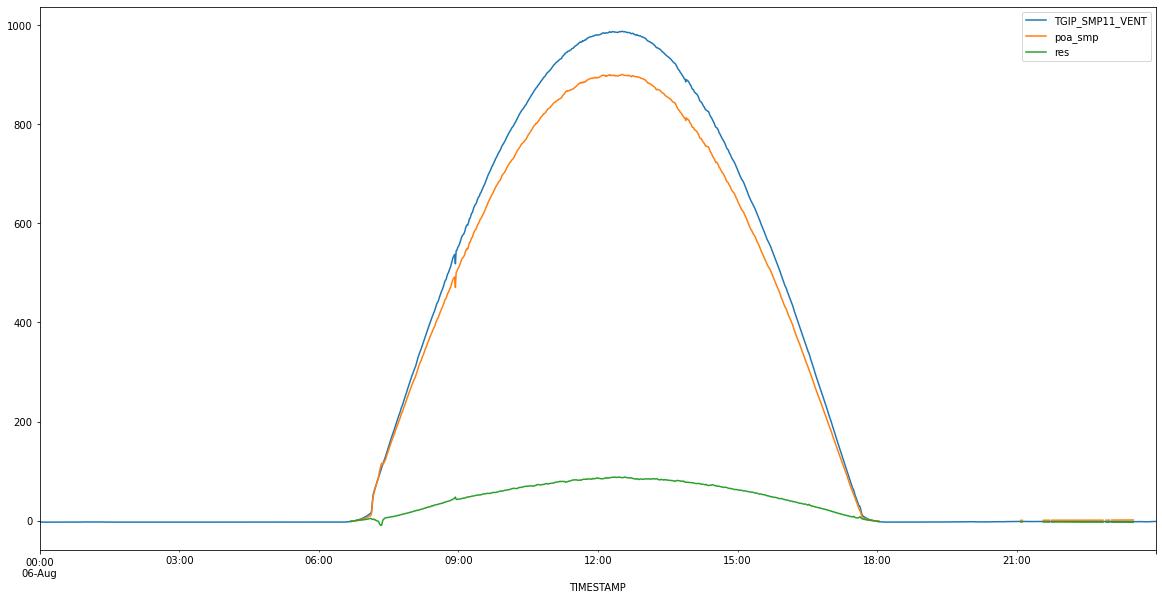

In [89]:
gtib.loc['2020-08-06'].plot(figsize=(20,10))

<AxesSubplot:xlabel='TIMESTAMP'>

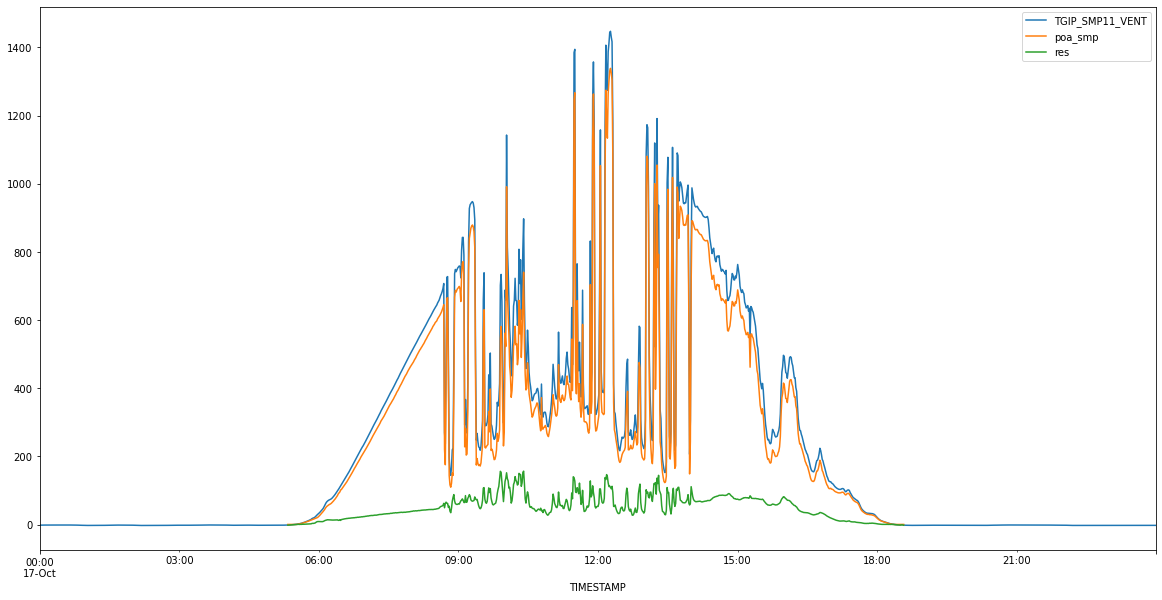

In [101]:
gtib.loc['2020-10-17'].plot(figsize=(20,10))

<AxesSubplot:xlabel='TIMESTAMP'>

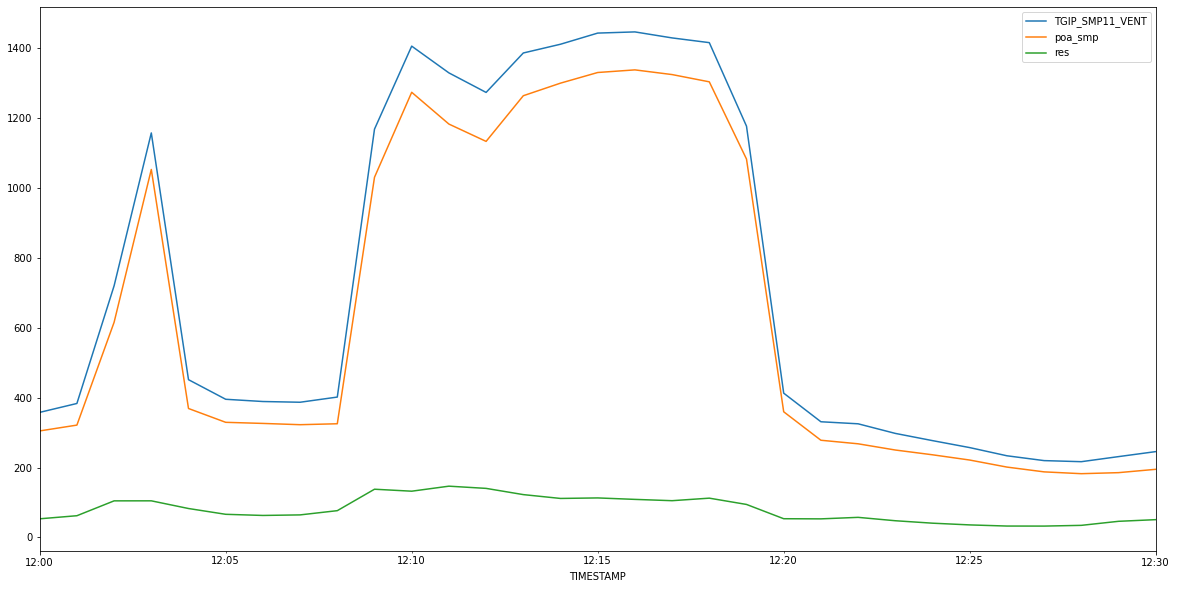

In [102]:
gtib.loc['2020-10-17 12:00:00':'2020-10-17 12:30:00'].plot(figsize=(20,10))


<AxesSubplot:xlabel='TIMESTAMP'>

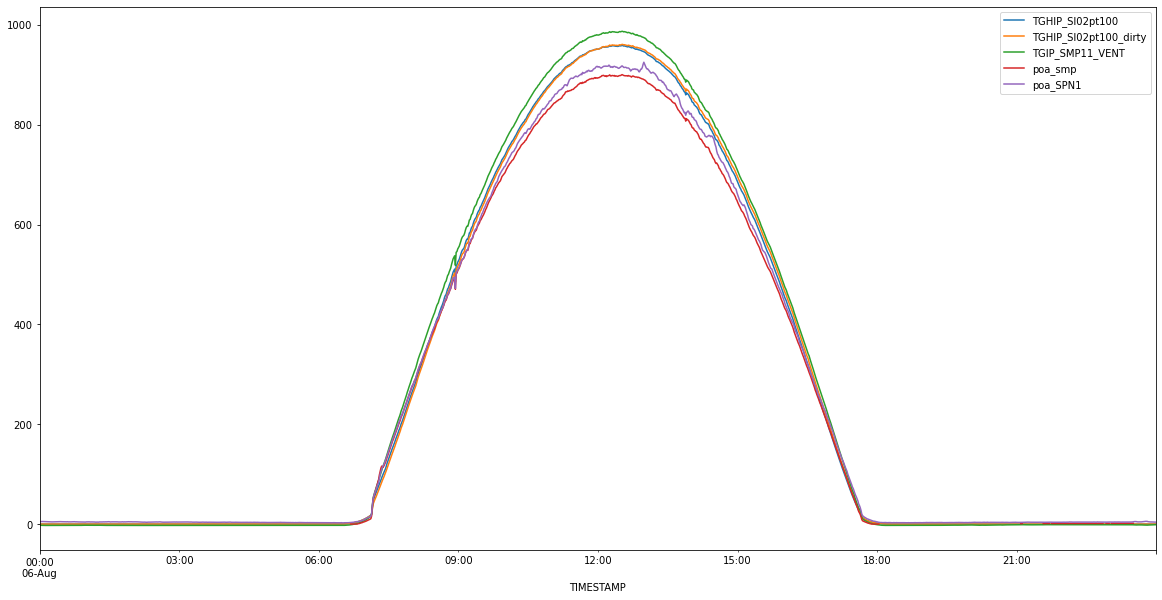

In [83]:
gti.loc['2020-08-06'].plot(figsize=(20,10))

In [103]:
residual = gtib.res/gtib.TGIP_SMP11_VENT

<AxesSubplot:xlabel='TIMESTAMP'>

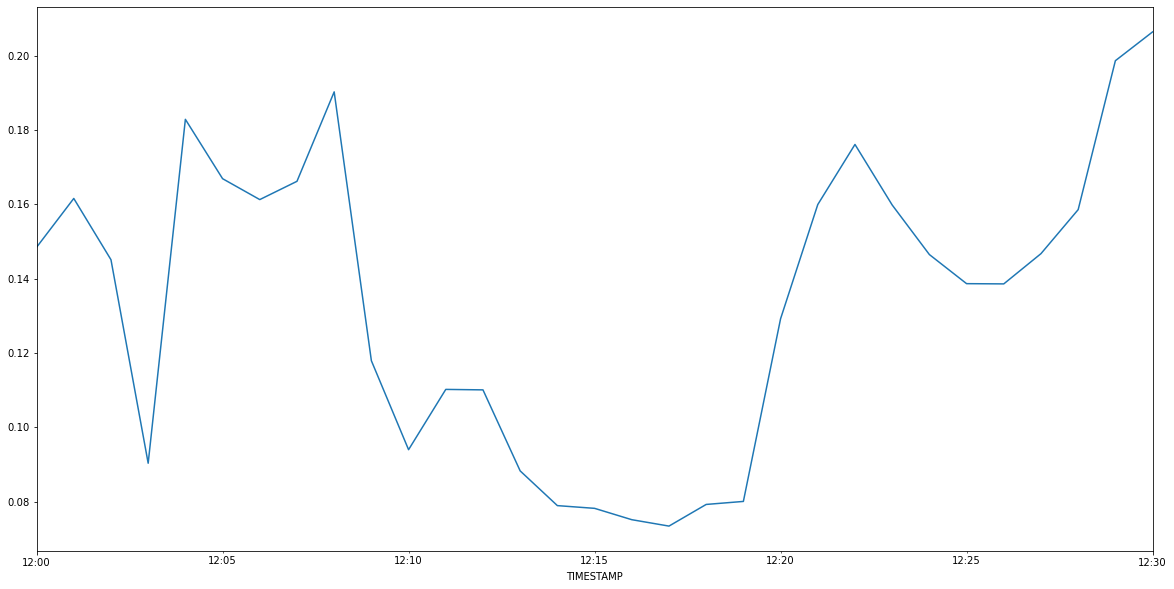

In [106]:
residual.loc['2020-10-17 12:00:00':'2020-10-17 12:30:00'].plot(figsize=(20,10))

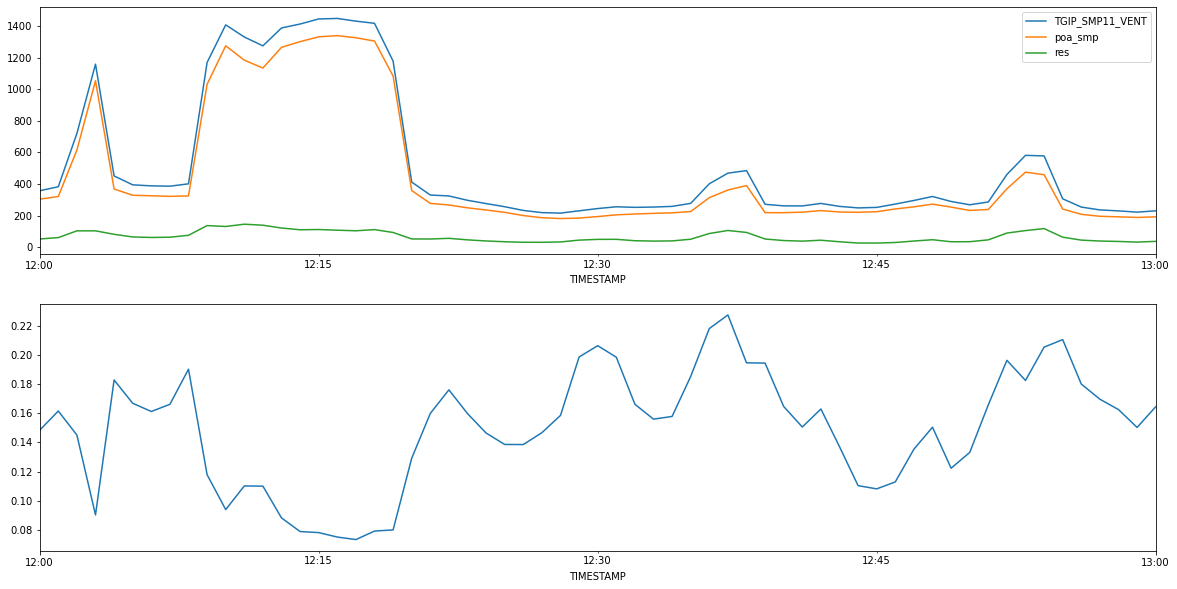

In [117]:
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(20,10))#
f1 = gtib.loc['2020-10-17 12:00:00':'2020-10-17 13:00:00'].plot(ax = axes[0])
f2 = residual.loc['2020-10-17 12:00:00':'2020-10-17 13:00:00'].plot(ax = axes[1])


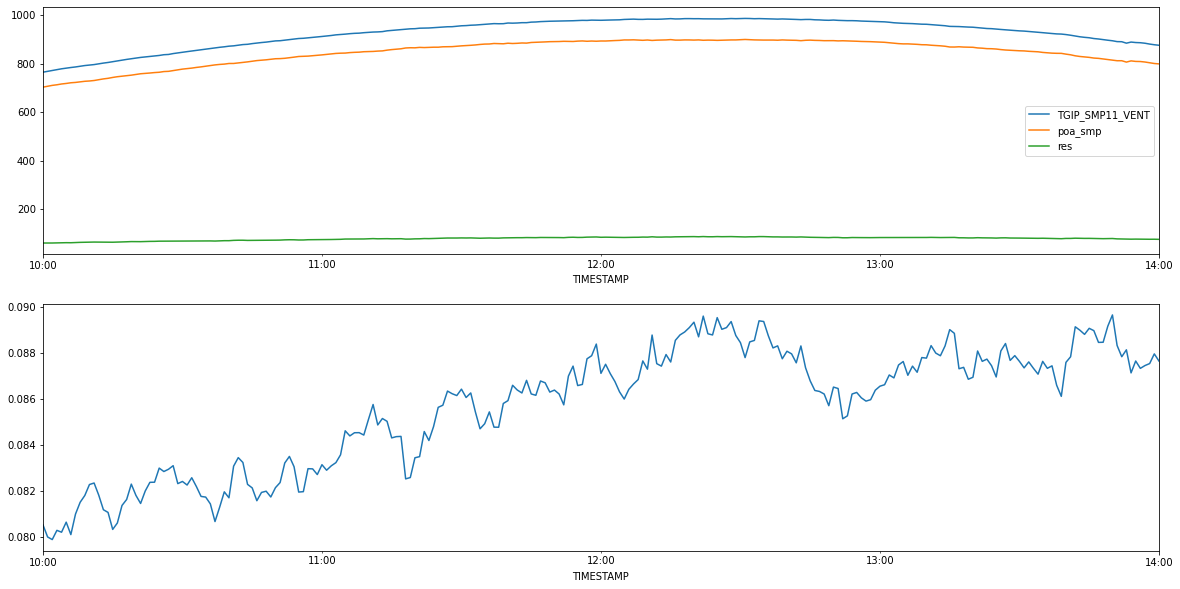

In [120]:
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(20,10))#
f1 = gtib.loc['2020-08-06 10:00:00':'2020-08-06 14:00:00'].plot(ax = axes[0])
f2 = residual.loc['2020-08-06 10:00:00':'2020-08-06 14:00:00'].plot(ax = axes[1])


In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(20,10))#
f1 = gtib.loc['2020-10-17 12:00:00':'2020-10-17 13:00:00'].plot(ax = axes[0])
f2 = residual.loc['2020-10-17 12:00:00':'2020-10-17 13:00:00'].plot(ax = axes[1])

<AxesSubplot:xlabel='TIMESTAMP'>

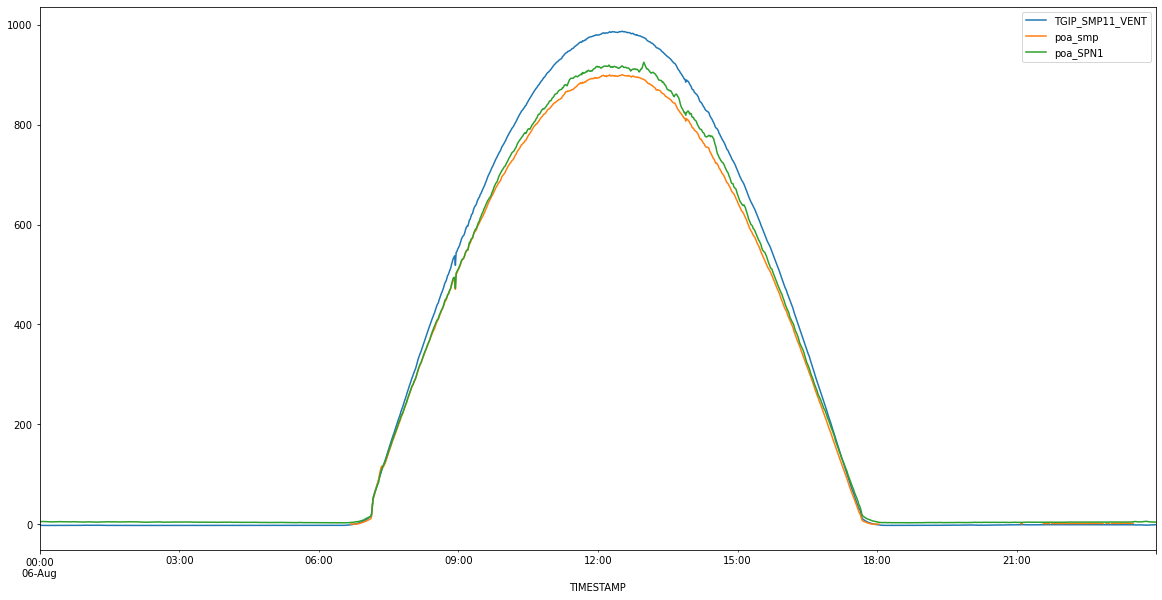

In [132]:
gtic.loc['2020-08-06'].plot(figsize=(20,10))


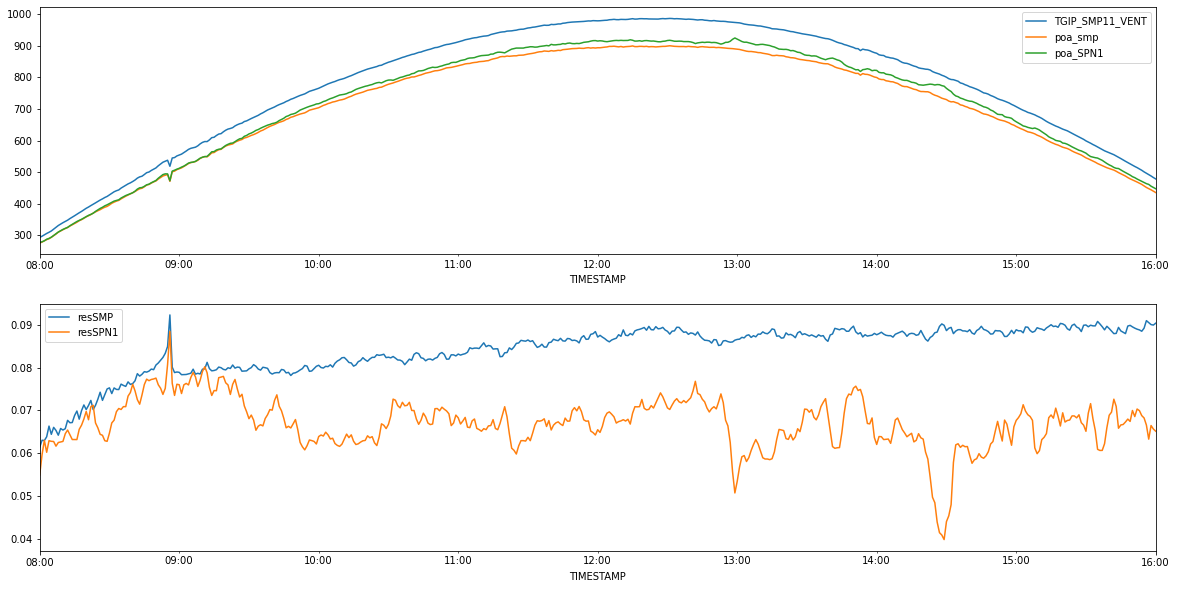

In [155]:
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(20,10))#
f1 = gtic.loc['2020-08-06 08:00:00':'2020-08-06 16:00:00'].plot(ax = axes[0])
f2 = resi['2020-08-06 08:00:00':'2020-08-06 16:00:00'].plot(ax = axes[1])



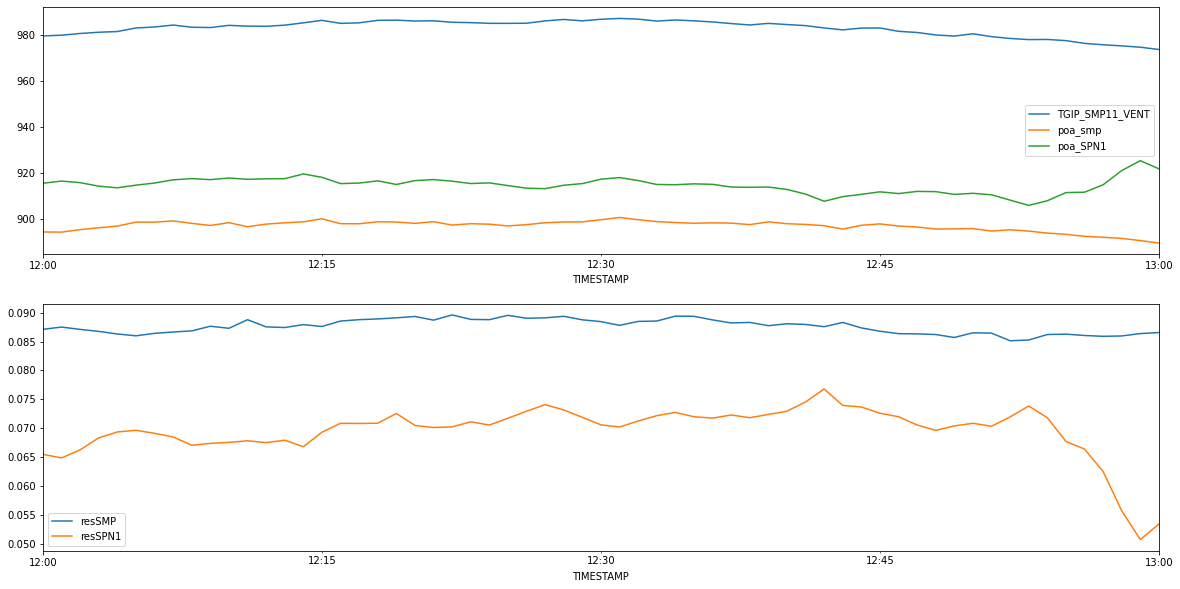

In [162]:
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(20,10))#
f1 = gtic.loc['2020-08-06 12:00:00':'2020-08-06 13:00:00'].plot(ax = axes[0])
f2 = resi['2020-08-06 12:00:00':'2020-08-06 13:00:00'].plot(ax = axes[1])


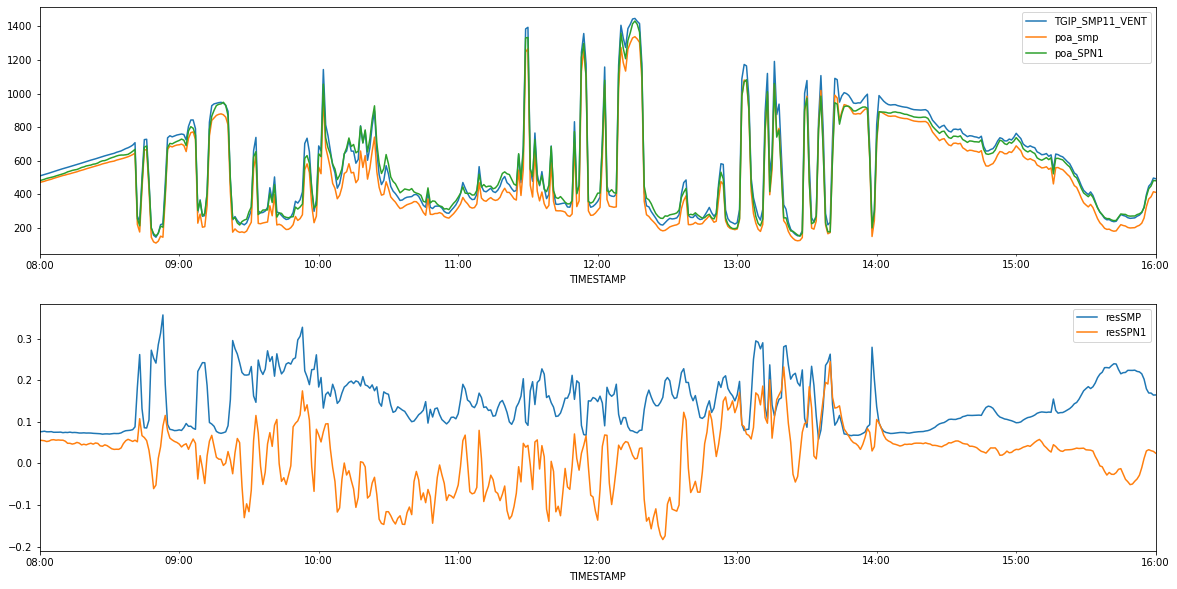

In [158]:
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(20,10))#
f1 = gtic.loc['2020-10-17 08:00:00':'2020-10-17 16:00:00'].plot(ax = axes[0])
f2 = resi['2020-10-17 08:00:00':'2020-10-17 16:00:00'].plot(ax = axes[1])


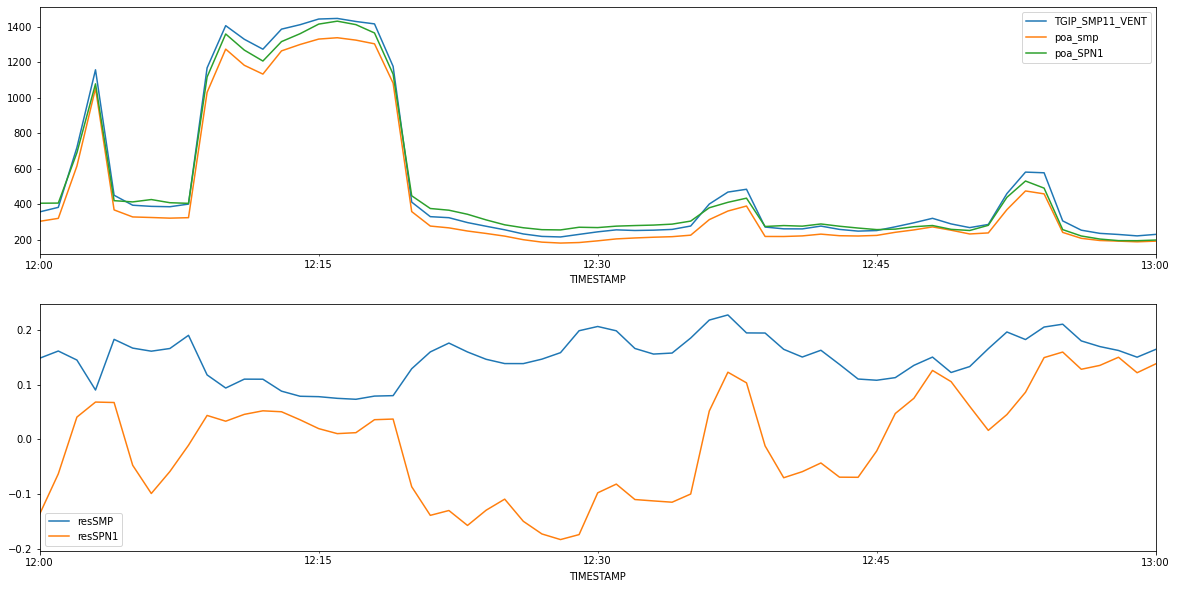

In [160]:
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(20,10))#
f1 = gtic.loc['2020-10-17 12:00:00':'2020-10-17 13:00:00'].plot(ax = axes[0])
f2 = resi['2020-10-17 12:00:00':'2020-10-17 13:00:00'].plot(ax = axes[1])
